In [ ]:
# Name: Carlos Sanchez
# Student ID: 21111910

# Question 3


## Part 2



In [ ]:
# Import useful libraries. Feel free to use sklearn.
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings("ignore")


# Load MNIST dataset.
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

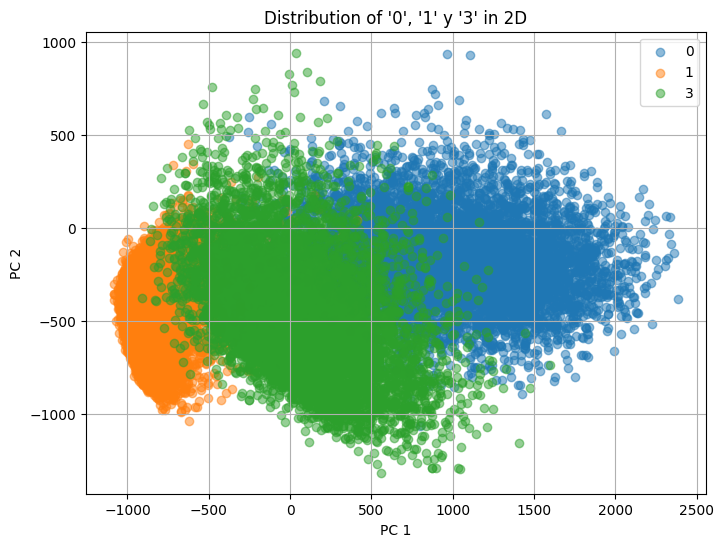

In [ ]:
# Conduct PCA to reduce the dimensionality of X.
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Visualize the data distribution of digits '0', '1' and '3' in a 2D scatter plot.
digit_mask = np.isin(y, ['0', '1', '3'])
X_filtered = X_reduced[digit_mask]
y_filtered = y[digit_mask]

plt.figure(figsize=(8, 6))
for digit in np.unique(y_filtered):
    plt.scatter(X_filtered[y_filtered == digit, 0], X_filtered[y_filtered == digit, 1], label=digit, alpha=0.5)
plt.title("Distribution of '0', '1' y '3' in 2D")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()

We can clearly see that the points corresponding to the value 3 can be located between the cluster of points representing 0 and the cluster of points representing 1.

To print an image of a value 3 from only the points of 0 and 1, it could work if we first find the centroids of the clusters for each value(0 and 1), and then we try to give a weight for the values of each centroid. Then, id we add this values with each weight, we could get an image that represents a 3.

In the following code, I have tried various values for both weights, and the ones that make the output to be as close as posible to 3 are w0 = 0.4 and w1 = 0.6. The output image is the following.

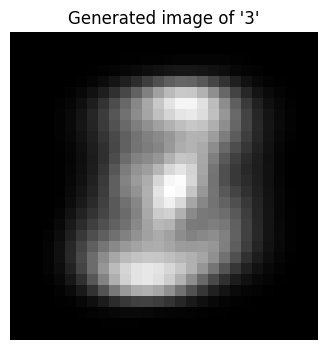

In [ ]:
# Generate an image of digit '3' using 2D representations of digits '0' and '1'.
X_0 = X_reduced[y == '0']
X_1 = X_reduced[y == '1']

centroid_0 = np.mean(X_0, axis=0)
centroid_1 = np.mean(X_1, axis=0)

weight_0 = 0.4
weight_1 = 0.6
generated_image = weight_0 * centroid_0 + weight_1 * centroid_1

plt.figure(figsize=(4, 4))
plt.imshow(pca.inverse_transform(generated_image).reshape(28, 28), cmap='gray')
plt.title("Generated image of '3'")
plt.axis('off')
plt.show()